In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
X_df = pd.read_csv("vec_emb.csv",header=None)

In [ ]:
X_data = X_df.iloc[:,1:]
INDICES = X_df.iloc[:,0].to_numpy().astype(np.int64)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizamos features
X = StandardScaler().fit_transform(X_data)

# Visualizacion de datos

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visualizamos con tSNE
tSNE = TSNE(n_components=2)
X_tsne = tSNE.fit_transform(X)

# Visualizamos con tSNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'tSNE2')

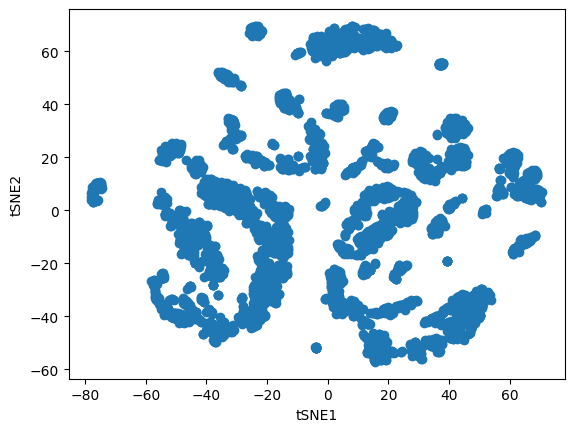

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

Text(0, 0.5, 'PC2')

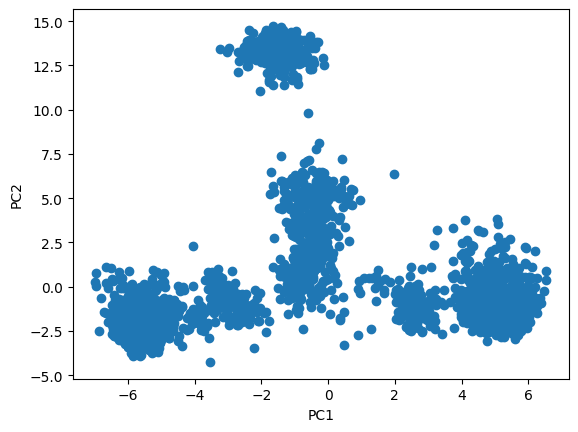

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')

# Cluster

## K-Means

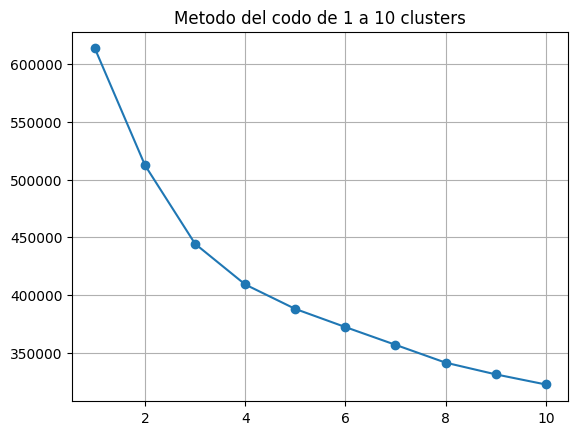

In [ ]:
from sklearn.cluster import KMeans

sse = []
clusters = list(range(1, 11))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=200).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

Seleccionamos el numeros de clusters

In [ ]:
modelo1 = KMeans(n_clusters=4, n_init=20, max_iter=300)
modelo1.fit(X)

centros1 = modelo1.cluster_centers_
labels1 = modelo1.labels_

### Graficos Kmeans

Text(0, 0.5, 'TSNE2')

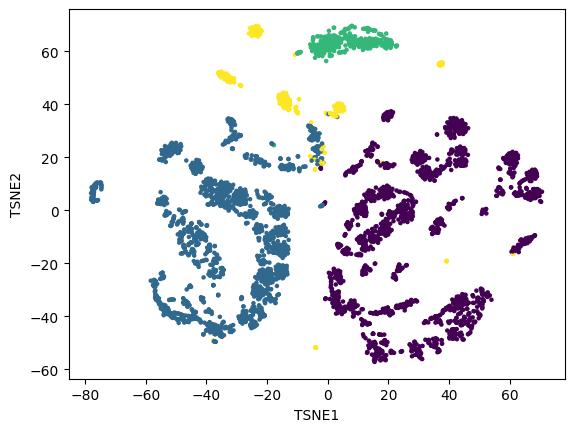

In [ ]:
# Graficamos cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=5,c=labels1)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

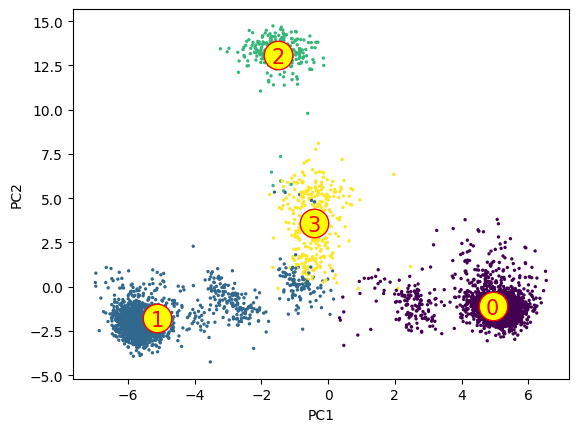

In [ ]:
# Transformamos los centroides
cen1_pca= pca.transform(centros1)

# Graficamos los clusters con sus centroides
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=2,c=labels1)

# Centroides
plt.scatter(cen1_pca[:,0], cen1_pca[:,1], s=420, facecolors='yellow', edgecolors='r')
for i in range(len(cen1_pca)):
    plt.text(cen1_pca[i,0], cen1_pca[i,1], f'{i}', color='red', fontsize=15, ha="center", va= "center_baseline")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Cluster estratificado

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#complete = linkage(X, method="complete")
#single = linkage(X, method="single")
#average = linkage(X, method="average")
ward = linkage(X, method="ward")

In [ ]:
#dendrogram(complete)
#plt.xlabel("Indices de los datos")
#plt.ylabel("Distancia")
#plt.title("Linkage: Complete")

In [ ]:
#dendrogram(single)
#plt.xlabel("Indices de los datos")
#plt.ylabel("Distancia")
#plt.title("Linkage: Single")

In [ ]:
#dendrogram(average)
#plt.xlabel("Indices de los datos")
#plt.ylabel("Distancia")
#plt.title("Linkage: Average")

Text(0.5, 1.0, 'Linkage: Ward')

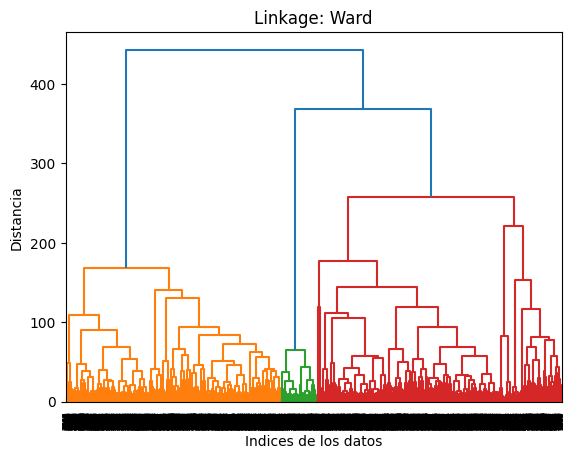

In [ ]:
dendrogram(ward)
plt.xlabel("Indices de los datos")
plt.ylabel("Distancia")
plt.title("Linkage: Ward")

In [ ]:
modelo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=250, linkage="ward")
modelo2.fit(X)

labels2 = modelo2.labels_

### Graficos estratificado

Text(0, 0.5, 'TSNE2')

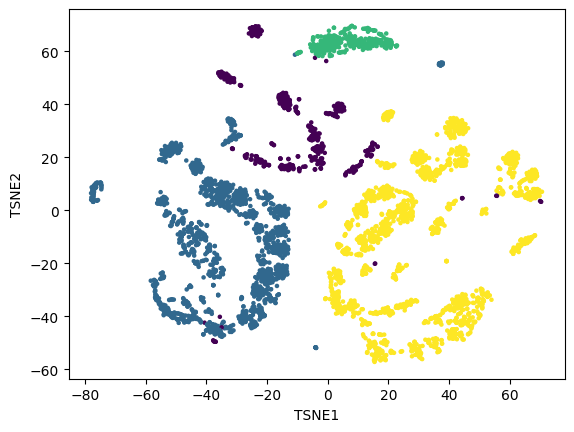

In [ ]:
# Graficamos cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=5,c=labels2)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

Text(0, 0.5, 'PC2')

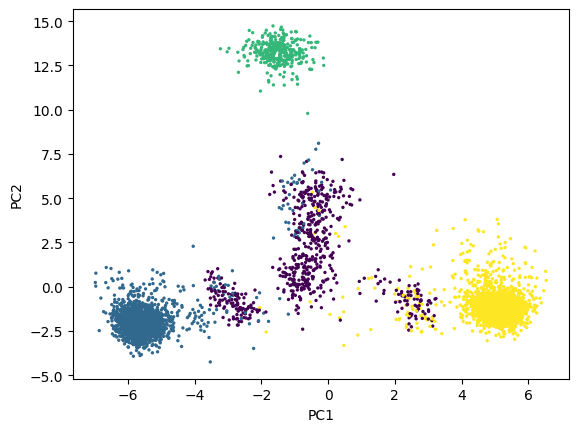

In [ ]:
# Graficamos los clusters con sus centroides
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=2,c=labels2)
plt.xlabel('PC1')
plt.ylabel('PC2')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

eps = 15
min_samples = 10

modelo3 = DBSCAN(eps=eps, min_samples=min_samples)
modelo3.fit(X)
labels3 = modelo3.labels_
np.unique(labels3)

array([-1,  0,  1], dtype=int64)

### Graficos DBSCAN

Text(0, 0.5, 'TSNE2')

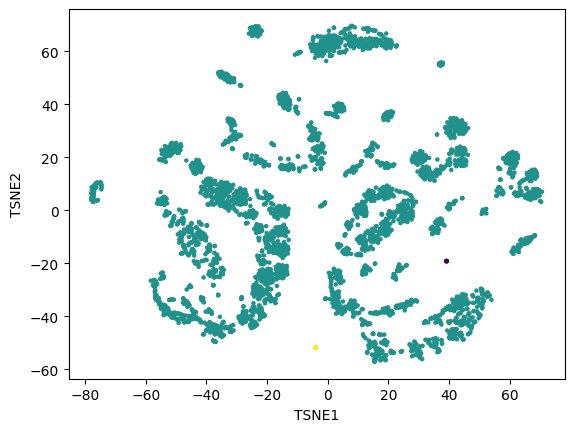

In [ ]:
# Graficamos cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=5,c=labels3)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

Text(0, 0.5, 'PC2')

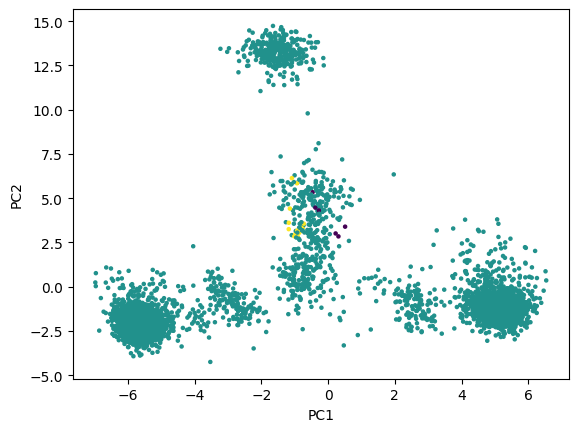

In [ ]:
# Graficamos los clusters con sus centroides
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=5,c=labels3)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Exportar cluster

In [ ]:
INDICES

array([   1,    4,    5, ..., 8279, 8280, 8281], dtype=int64)

In [ ]:
# IMPORTAMOS EL DF PARA OBTENER LA CANTIDAD DE FILAS
import os

df_path = os.getcwd() + "\\DATA\\parsed_data_public.parquet"
df_raw = pd.read_parquet(df_path)
N_df = df_raw.shape[0]

cluster_export= (-1) *np.ones(N_df,dtype=int)

# CLUSTER, poner el cluster final que ocuparemos para el analisis
f_cluster = labels1.copy()
n_clu = len(f_cluster)

for i in range(n_clu):
    cluster_export[INDICES[i]] = f_cluster[i]

# Crear y escribir el archivo
cluster = pd.DataFrame(cluster_export, columns=["cluster"])

cluster.to_pickle("cluster.pkl")